# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "0a3f547761154cd89b5616aa3f34603e9902d002"
connection.set_access_token(API_TOKEN)

Access token is valid.


#### NOTE: Before creating or executing the strategy, ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).![Reference](https://algobulls.github.io/pyalgotrading/python_build/imgs_v2/python_build_Oauth_successful.png)

# Strategy Creation

## Import Strategy from pyalgostrategypool

In [5]:
! wget -O bollinger_bands_us.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/bollinger_bands/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' bollinger_bands_us.py

--2023-12-01 22:51:59--  https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/bollinger_bands/_strategy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3532 (3.4K) [text/plain]
Saving to: ‘bollinger_bands_us.py’

bollinger_bands_us. 100%[===================>]   3.45K  --.-KB/s    in 0s      

2023-12-01 22:51:59 (56.1 MB/s) - ‘bollinger_bands_us.py’ saved [3532/3532]



In [6]:
from bollinger_bands_us import BollingerBands as strategy_cls

In [7]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 137573,
 'strategyId': '8933340d212146118b753099855e6941'}

In [8]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [9]:
instrument = connection.search_instrument('NVDA', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:NVDA'

## Setup Parameters

In [10]:
parameters = {
  'TIME_PERIOD': 12,
  'STANDARD_DEVIATIONS': 2,
}

In [11]:
initial_virtual_funds = 4000     # in dollars

## Backtesting

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [12]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds
)


Starting the strategy 'Bollinger Bands' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════════════════════════╕
│ Config                  │ Value                                         │
╞═════════════════════════╪═══════════════════════════════════════════════╡
│ Strategy Name           │ Bollinger Bands                               │
├─────────────────────────┼───────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                   │
├─────────────────────────┼───────────────────────────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:NVDA']                               │
├─────────────────────────┼───────────────────────────────────────────────┤
│ Quantity/Lots           │ 5                                             │
├─────────────────────────┼───────────────────────────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00-04:00                     │
├───────────────────────

### Status

In [13]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (6)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [15]:
print(logs)

[2023-12-01 22:52:46] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-12-01 22:52:46] Sanity checks on cfg successful.
[2023-12-01 22:52:46] Currency set to "USD"
[2023-12-01 22:52:46] Setting up broker connection...
[2023-12-01 22:52:47] Starting ALPACAV2 in PAPER mode...
[2023-12-01 22:52:48] Broker connection has been setup successfully.
[2023-12-01 22:52:48] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '4000.00'
[2023-12-01 22:52:48] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-12-01 22:52:48] Welcome ALGOBULLS VIRTUAL USER!
[2023-12-01 22:52:48] Reading strategy...
[2023-12-01 22:52:48] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  

### Stop

In [16]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Fail.
Forbidden: Content: b'{"message":"Strategy execution is already in the STOPPING state."}' | Raw: b''


## Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NASDAQ,NVDA,2021-08-02 10:30:00-04:00,SELL,5,$,195.99,,2021-08-02 15:30:00-04:00,BUY,5,$,197.99,,-10.00,-10.00,0,-10.00
1,NASDAQ,NVDA,2021-08-03 11:30:00-04:00,SELL,5,$,194.52,,2021-08-03 12:30:00-04:00,BUY,5,$,197.20,,-13.40,-23.40,0,-13.40
2,NASDAQ,NVDA,2021-08-03 12:30:00-04:00,BUY,5,$,197.20,,2021-08-03 15:30:00-04:00,SELL,5,$,197.20,,0.00,-23.40,0,0.00
3,NASDAQ,NVDA,2021-08-04 12:30:00-04:00,SELL,5,$,200.73,,2021-08-04 15:30:00-04:00,BUY,5,$,200.73,,0.00,-23.40,0,0.00
4,NASDAQ,NVDA,2021-08-06 12:30:00-04:00,BUY,5,$,204.37,,2021-08-06 15:30:00-04:00,SELL,5,$,204.37,,0.00,-23.40,0,0.00
5,NASDAQ,NVDA,2021-08-10 12:30:00-04:00,BUY,5,$,199.74,,2021-08-10 15:30:00-04:00,SELL,5,$,199.74,,0.00,-23.40,0,0.00
6,NASDAQ,NVDA,2021-08-13 11:30:00-04:00,SELL,5,$,201.12,,2021-08-13 15:30:00-04:00,BUY,5,$,200.62,,2.50,-20.90,0,2.50
7,NASDAQ,NVDA,2021-08-16 11:30:00-04:00,BUY,5,$,196.12,,2021-08-16 15:30:00-04:00,SELL,5,$,196.62,,2.50,-18.40,0,2.50
8,NASDAQ,NVDA,2021-08-19 09:30:00-04:00,BUY,5,$,194.95,,2021-08-19 15:30:00-04:00,SELL,5,$,204.08,,45.65,27.25,0,45.65
9,NASDAQ,NVDA,2021-08-31 11:30:00-04:00,BUY,5,$,223.69,,2021-08-31 15:30:00-04:00,SELL,5,$,225.00,,6.55,33.80,0,6.55


## Statistics Reports

### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-02
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      71.0%

Cumulative Return   1.08%
CAGR﹪              0.54%

Sharpe              0.29
Prob. Sharpe Ratio  59.59%
Sortino             0.45
Sortino/√2          0.32
Omega               1.07

Max Drawdown        -5.96%
Longest DD Days     581

Gain/Pain Ratio     0.07
Gain/Pain (1M)      0.12

Payoff Ratio        1.02
Profit Factor       1.07
Common Sense Ratio  0.84
CPC Index           0.56
Tail Ratio          0.79
Outlier Win Ratio   7.07
Outlier Loss Ratio  3.61

MTD                 -0.27%
3M                  2.19%
6M                  2.26%
YTD                 3.15%
1Y                  2.44%
3Y (ann.)           0.54%
5Y (ann.)           0.54%
10Y (ann.)          0.54%
All-time (ann.)     0.54%

Avg. Drawdown       -2.19%
Avg. Drawdown Days  217
Recovery Factor     0.18
Ulcer Index         0.03
Serenity Index      0.03


### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-02
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             71.0%

Cumulative Return          1.08%
CAGR﹪                     0.54%

Sharpe                     0.29
Prob. Sharpe Ratio         59.59%
Smart Sharpe               0.24
Sortino                    0.45
Smart Sortino              0.37
Sortino/√2                 0.32
Smart Sortino/√2           0.26
Omega                      1.07

Max Drawdown               -5.96%
Longest DD Days            581
Volatility (ann.)          5.97%
Calmar                     0.09
Skew                       0.86
Kurtosis                   7.16

Expected Daily %           0.01%
Expected Monthly %         0.04%
Expected Yearly %          0.36%
Kelly Criterion            3.25%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.61%
Expected Shortfall (cVaR)  -0.61%

Max Consecutive Wins       4
Ma

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-12-27,2022-09-26,2023-07-31,581,-5.957436,-5.887276
2,2021-08-03,2021-08-03,2021-08-19,15,-0.335840,-0.273183
3,2021-09-02,2021-10-20,2021-10-26,54,-0.267738,-0.242947


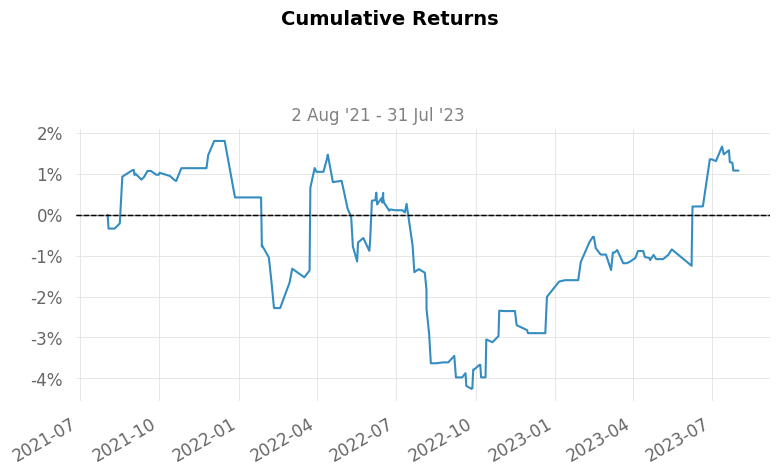

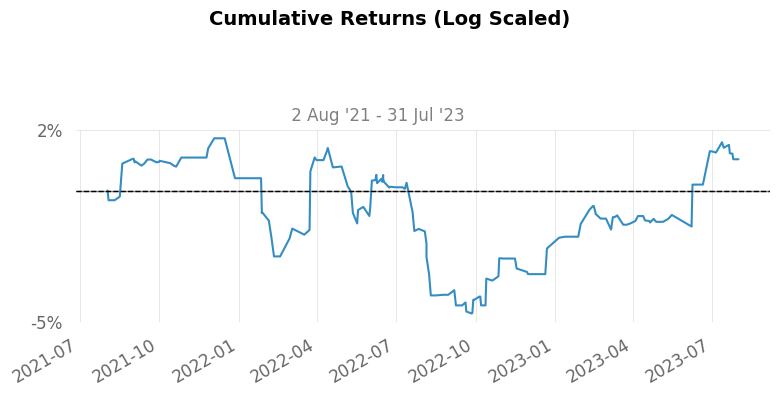

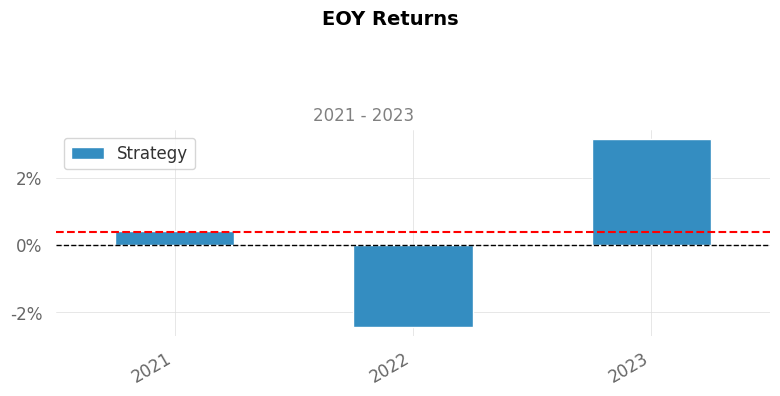

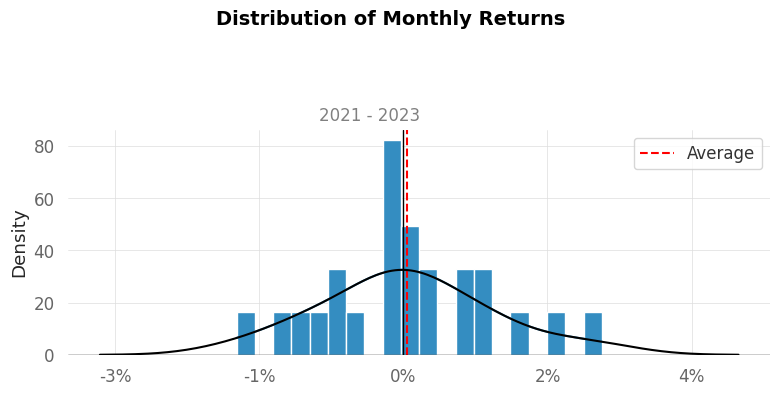

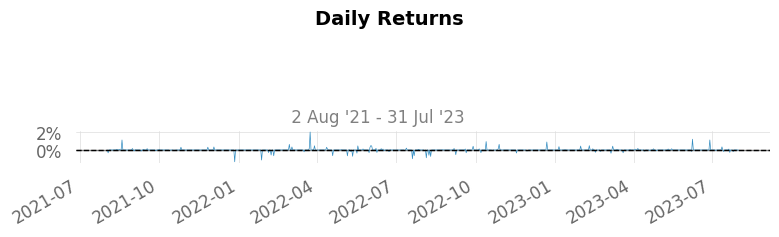

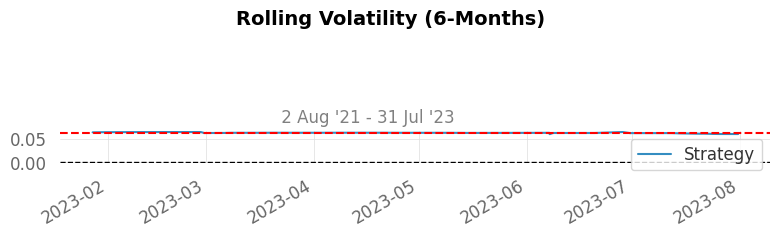

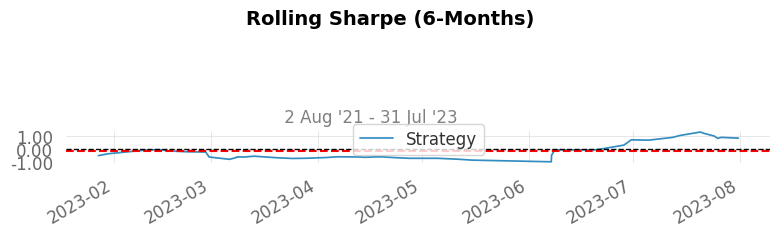

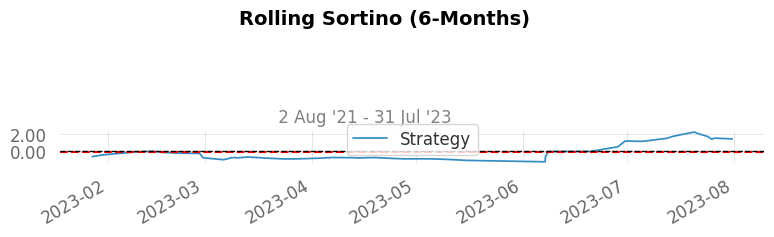

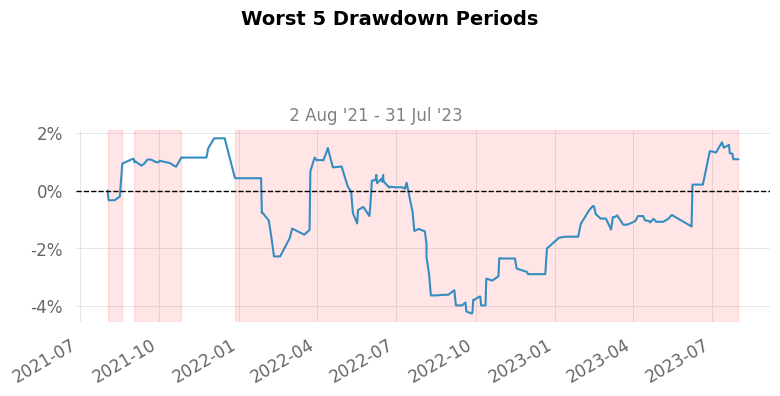

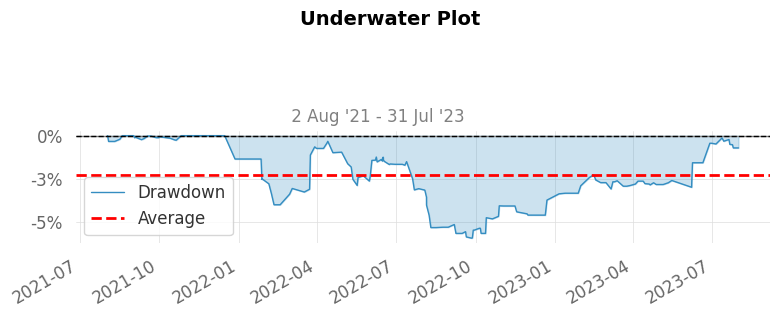

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


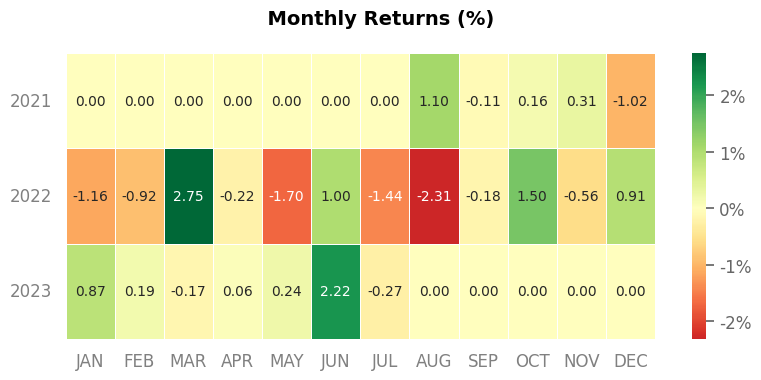

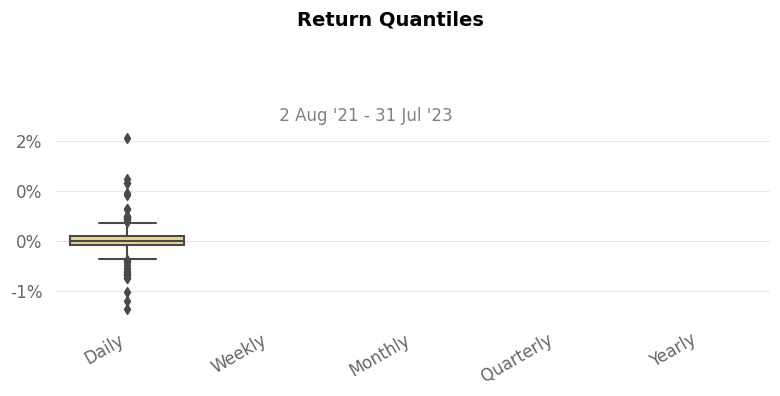

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True)

## Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 743a3ece035c4125a6d90b8a42ad8e29 |
| Transaction Type | BUY                              |
| Instrument       | NASDAQ:NVDA                      |
| Quantity         | 5                                |
| Price            | $467.02                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-12-01T17:27:15.705429Z | COMPLETE               |
| 2023-12-01T17:27:15.705412Z | OPEN                   |
| 2023-12-01T17:27:15.705394Z | OPEN PENDING           |
| 2023-12-01T17:27:15.705374Z | VALIDATION PENDING     |
| 2023-12-01T17:27:15.705322Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | 6525871d66c34e50a

## Papertrading

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [ ]:
broking_details = {
    'brokerName': 'ALPACA LIVE',
    'credentialParameters': {}
}

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)